In [1]:
%config Completer.use_jedi = False
import warnings

warnings.filterwarnings(action='ignore')

# 선형 판별 분석(LDA, Linear Discriminant Analysis)
LDA는 지도 학습적인 접근 방법을 통한 차원 축소 알고리즘으로 우리말로 선형 판별 분석이라고 부른다. 여기서 선형 판별 분석이라는 말의 뜻은 데이터 포인트가 속하는 클래스를 구분하는 판별 함수가 선형 형태의 함수라는 뜻이다.

데이터셋의 기존 공간으로부터 집단 간 분산과 집단 내 분산의 비율을 최대화하는 기존 공간보다 더 작은 차원의 공간으로 원래 데이터를 투영시킴으로써 차원 축소한다. 즉, 데이터를 최대한 분리해 주는 기능을 한다.

LDA는 크게 3단계 과정을 거친다. 첫 번째 단계로, 집단간 거리를 계산한다. 이를 집단간 분산이라고 한다. 두 번째 단계는 각 집단의 평균과 각 데이터 포인트의 거를 계산한다. 이를 집단 내 분산이라고 한다. 마지막 세 번째 단계는 기존 데이터셋의 공간보다 더 작은 차원의 공간을 만드는 것이다. 이 공간은 집단 간 분산을 최대화하고 집단 내 분산을 최소로 하는 공간이어야 한다.

LDA 알고리즘을 활용해 와인 종류를 분류하는 모델을 생성해본다.

In [2]:
# 데이터 불러오기
from sklearn import datasets  # 와인 데이터를 사용하기 위해 import 한다.

raw_wine = datasets.load_wine()  # 와인 데이터를 불러온다.

In [3]:
# 피쳐/타겟 데이터 지정
X = raw_wine.data  # 와인 피쳐 데이터를 저장한다.
y = raw_wine.target  # 와인 타겟 데이터를 저장한다.

In [4]:
# 트레이닝/테스트 데이터 분할
from sklearn.model_selection import train_test_split  # 트레이닝/테스트 데이터 분할을 위해 import 한다.

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state=1)  # 트레이닝 데이터와 테스트 데이터로 분할한다.
X_tn.shape, X_te.shape

((133, 13), (45, 13))

In [5]:
# 데이터 표준화
from sklearn.preprocessing import StandardScaler  # 데이터 표준화를 위해 import 한다.

std_scale = StandardScaler()  # 표준화 스케일러 객체를 만든다.
# 표준화는 트레이닝 데이터를 기반으로 실행하므로 트레이닝 피쳐 데이터 X_tn을 표준화 스케일러에 적합시킨다.
std_scale.fit(X_tn)
X_tn_std = std_scale.transform(X_tn)  # 트레이닝 피쳐 데이터 X_tn을 표준화 한다.
X_te_std = std_scale.transform(X_te)  # 테스트 피쳐 데이터 X_te를 표준화 한다.

In [6]:
# LDA를 통한 데이터 차원 축소
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis  # LDA 알고리즘을 사용하기 위해 import 한다.

# n_components 옵션으로 원하는 차원을 설정할 수도 있지만, 기본값은 min(클래스 개수 - 1, 피처 개수) 이다.
# n_components 옵션 생략시 와인 데이터의 클래스 개수 3이고 피처 개수 13이므로 n_components 값은 min(3 - 1, 13) => 2로
# 설정된다.
# n_components 옵션 생략시 기존 13차원 데이터는 2차원으로 줄어들게 된다. n_components = 1로 설정한다면 1차원으로
# 줄어들게 된다.
lda = LinearDiscriminantAnalysis()  # LDA 객체를 만든다.
lda.fit(X_tn_std, y_tn)  # 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn를 LDA 객체에 적합시킨다.
X_tn_lda = lda.transform(X_tn_std)  # 적합된 LDA 모형을 바탕으로 표준화된 트레이닝 데이터의 차원을 축소한다.
X_te_lda = lda.transform(X_te_std)  # 적합된 LDA 모형을 바탕으로 표준화된 테스트 데이터의 차원을 축소한다.

In [7]:
# 데이터 차원 축소 확인
# 차원 축소 이전 데이터의 차원을 확인하면, 오리지널 피쳐 데이터는 13차원의 데이터 133개로 구성되어 있음을 확인할
# 수 있고 주성분 분석을 이용해 차원 축소한 데이터는 2차원 데이터 133개로 구성되어 있음을 확인할 수 있다.
X_tn_std.shape, X_tn_lda.shape

((133, 13), (133, 2))

In [8]:
# LDA 상수항, 가중 벡터 확인
print(lda.intercept_)  # intercept_ 속성으로 LDA 모형의 상수 항을 확인할 수 있다.
# coef_ 속성으로 LDA 모형의 가중 벡터를 확인할 수 있다. 가중 벡터의 차원은 클래스 개수 * 피처 개수로 나타난다.
print(lda.coef_)

[ -9.49063922  -3.6792656  -10.65310672]
[[ 2.11536841  0.34171834  1.60756274 -2.62777005 -0.02954383 -1.92461007
   5.43612614  0.30142527 -0.66723405 -2.08948728  0.53569108  3.06011656
   5.45318503]
 [-1.18707715 -0.97635273 -1.64104916  1.19614378  0.22114803  0.2969019
   1.13721801  0.4338713   0.33425086 -1.57541361  0.56544507 -0.17730553
  -2.34856045]
 [-0.59547207  1.01875252  0.59754164  1.13544231 -0.28238675  1.65463974
  -7.48134065 -0.94177595  0.24492236  4.49319245 -1.38150969 -3.04974421
  -2.54627163]]


In [9]:
# LDA 적용 후 차원 축소된 데이터를 데이터프레임 형태로 변환한다.
import pandas as pd  # 데이터프레임 형태로 만들기 위해서 판다스 라이브러리를 import 한다.

lda_columns = ['lda_comp1', 'lda_comp2']  # 차원 축소된 데이터의 열 이름을 정한다.
X_tn_lda_df = pd.DataFrame(X_tn_lda, columns=lda_columns)  # 차원 축소된 데이터를 데이터프레임으로 만든다.
X_tn_lda_df['target'] = y_tn  # 차원 축소된 데이터로 만든 데이터프레임에 타겟 데이터를 결합한다.
X_tn_lda_df

,lda_comp1,lda_comp2,target
0,-2.563293,-0.503212,0
1,-0.646015,-2.169761,1
2,-3.981901,1.621584,0
3,-5.956216,3.878140,0
4,-4.047839,2.335699,0
...,...,...,...
128,3.519877,0.440679,2
129,4.457515,0.491287,2
130,0.639263,-1.684700,1
131,2.440212,1.168633,2


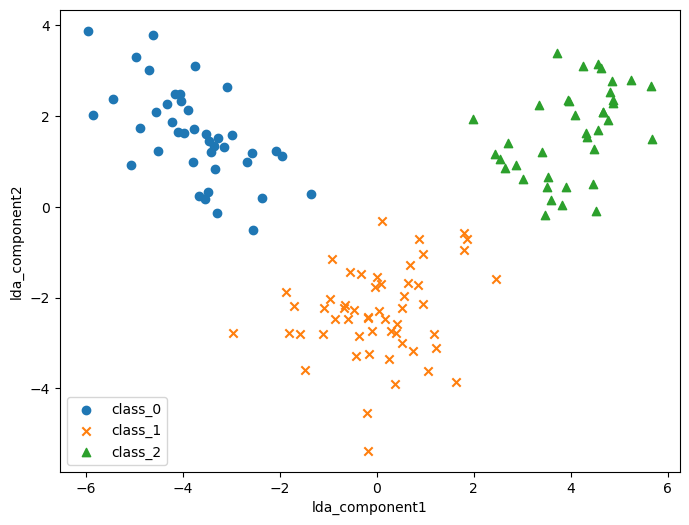

In [10]:
# LDA 적용 데이터 시각화
import matplotlib.pyplot as plt

df = X_tn_lda_df
markers = ['o', 'x', '^']  # 시각화에 사용할 마커를 지정한다.
plt.figure(figsize=[8, 6])

# enumerate() 함수는 (인덱스, 데이터) 형태의 튜플을 리턴한다.
for index, marker in enumerate(markers):
    df_index = df[df['target'] == index]  # 시각화할 와인 데이터를 얻어온다.
    target_index = raw_wine.target_names[index]  # 시각화할 와인의 타겟 이름을 얻어온다.
    X1 = df_index['lda_comp1']  # 시각화할 차원 축소된 데이터의 첫 번째 주성분 벡터를 얻어온다.
    X2 = df_index['lda_comp2']  # 시각화할 차원 축소된 데이터의 두 번째 주성분 벡터를 얻어온다.
    plt.scatter(X1, X2, marker=marker, label=target_index)  # 산포도를 그린다.
# =====

plt.xlabel('lda_component1')
plt.ylabel('lda_component2')
plt.legend()
plt.show()

In [11]:
# 데이터 학습 및 예측
from sklearn.ensemble import RandomForestClassifier  # 랜덤 포레스트 알고리즘을 사용하기 위해 import 한다.

clf_rf_lda = RandomForestClassifier(max_depth=2, random_state=0)  # 랜덤 포레스트 모델 객체를 만든다.
# 표준화된 피쳐 데이터 X_tn_std와 트레이닝 타겟 데이터 y_tn을 넣어서 랜덤 포레스트 알고리즘을 학습시킨다.
clf_rf_lda.fit(X_tn_lda, y_tn)
pred_rf_lda = clf_rf_lda.predict(X_te_lda)  # 표준화된 테스트 데이터 X_te_std로 예측한다.
pred_rf_lda

array([2, 1, 0, 1, 0, 2, 1, 0, 2, 1, 0, 0, 1, 0, 1, 1, 2, 0, 1, 0, 0, 1,
       2, 1, 0, 2, 0, 0, 0, 2, 1, 2, 2, 0, 1, 1, 1, 1, 1, 0, 0, 1, 2, 0,
       0])

In [12]:
# 정확도 평가
from sklearn.metrics import accuracy_score  # 모형 정확도를 평가하기 위해 import 한다.

# accuracy_score() 함수의 인수로 실제 타겟 데이터와 예측된 데이터를 넘겨 정확도를 평가한다.
accuracy = accuracy_score(y_te, pred_rf_lda)
accuracy

1.0